In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
heartDisease = pd.read_table('processedWithHeader.cleveland.data', sep=',', na_values=["?"])
heartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [2]:
print(heartDisease.shape)

(303, 14)


In [3]:
heartDisease.dropna(inplace=True)
print(heartDisease.shape)

(297, 14)


In [4]:
print(heartDisease['goal'].unique())

[0 2 1 3 4]


In [5]:
print(heartDisease.groupby('goal').size())

goal
0    160
1     54
2     35
3     35
4     13
dtype: int64


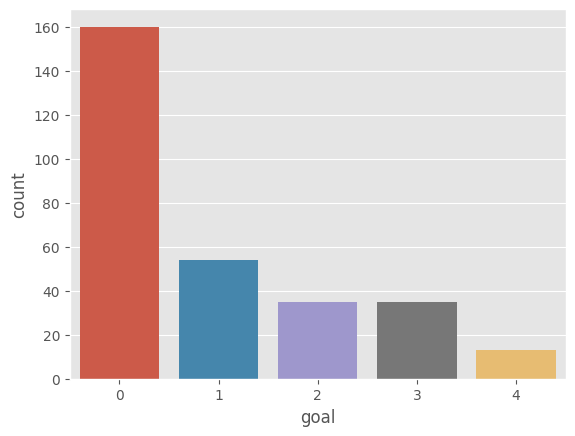

In [6]:
import seaborn as sns
sns.countplot(x ='goal', data = heartDisease)
plt.show()

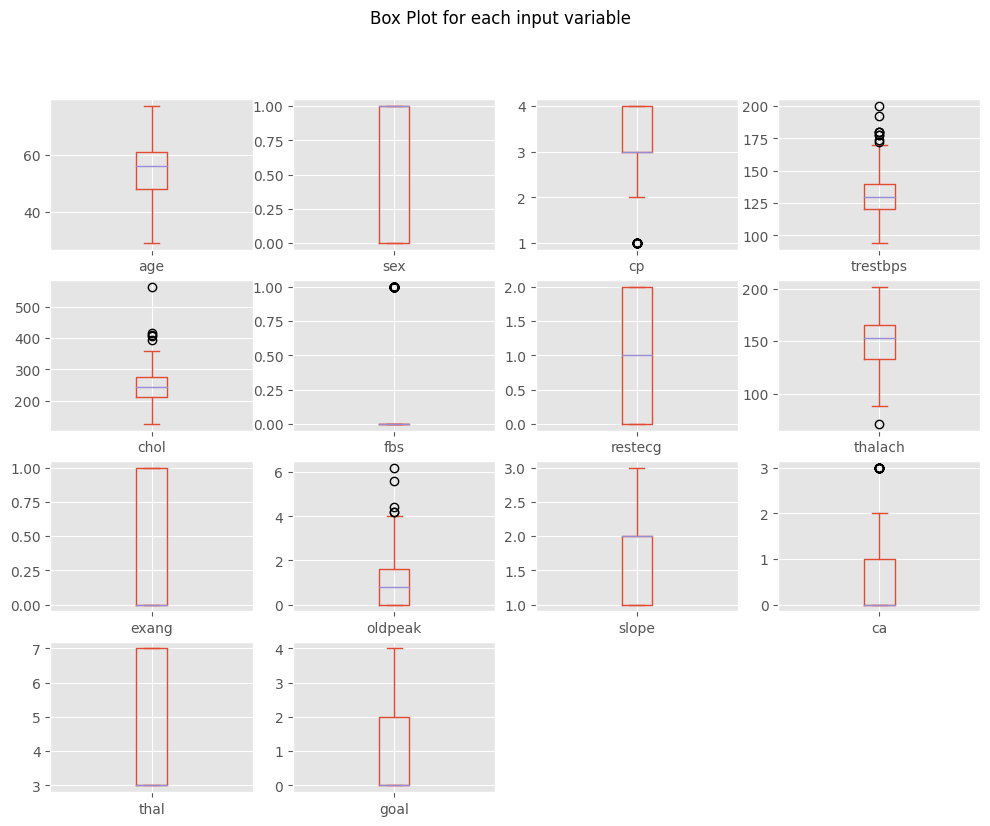

In [7]:
heartDisease.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,9), 
                    title='Box Plot for each input variable')
plt.savefig('heartDisease_box')
plt.show()

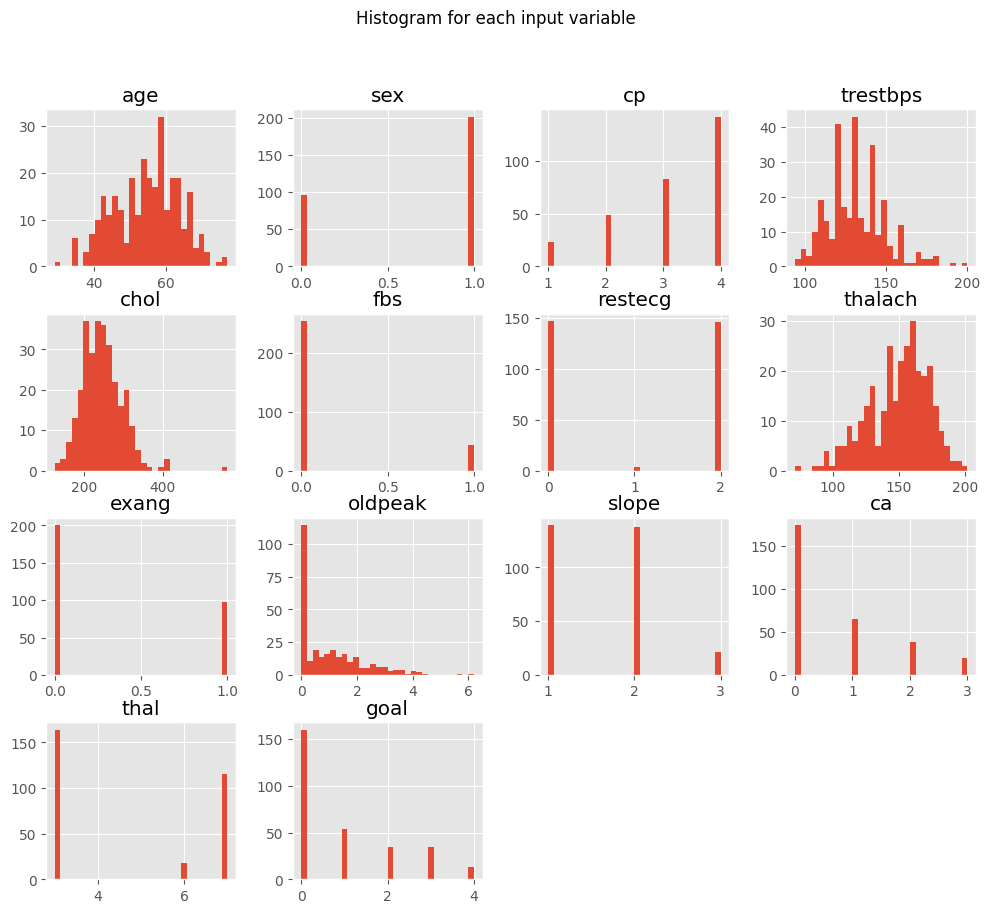

In [8]:
import pylab as pl
heartDisease.hist(bins=30, figsize=(12,10))
pl.suptitle("Histogram for each input variable")
plt.savefig('heartDisease_hist')
plt.show()

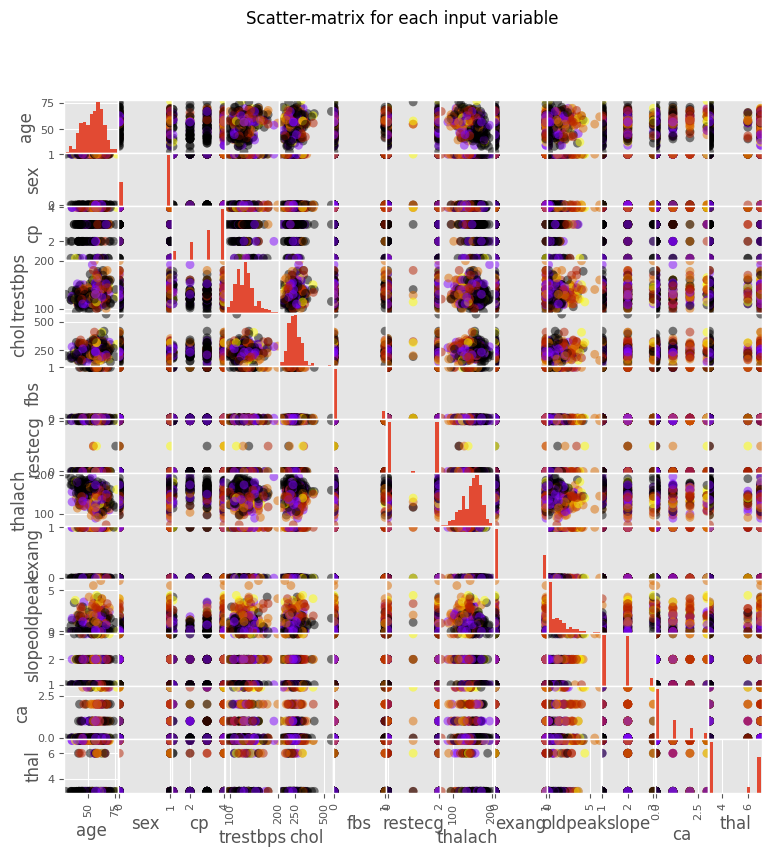

In [9]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
X = heartDisease.loc[:, heartDisease.columns != 'goal']
y = heartDisease['goal']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('heartDisease_scatter_matrix')

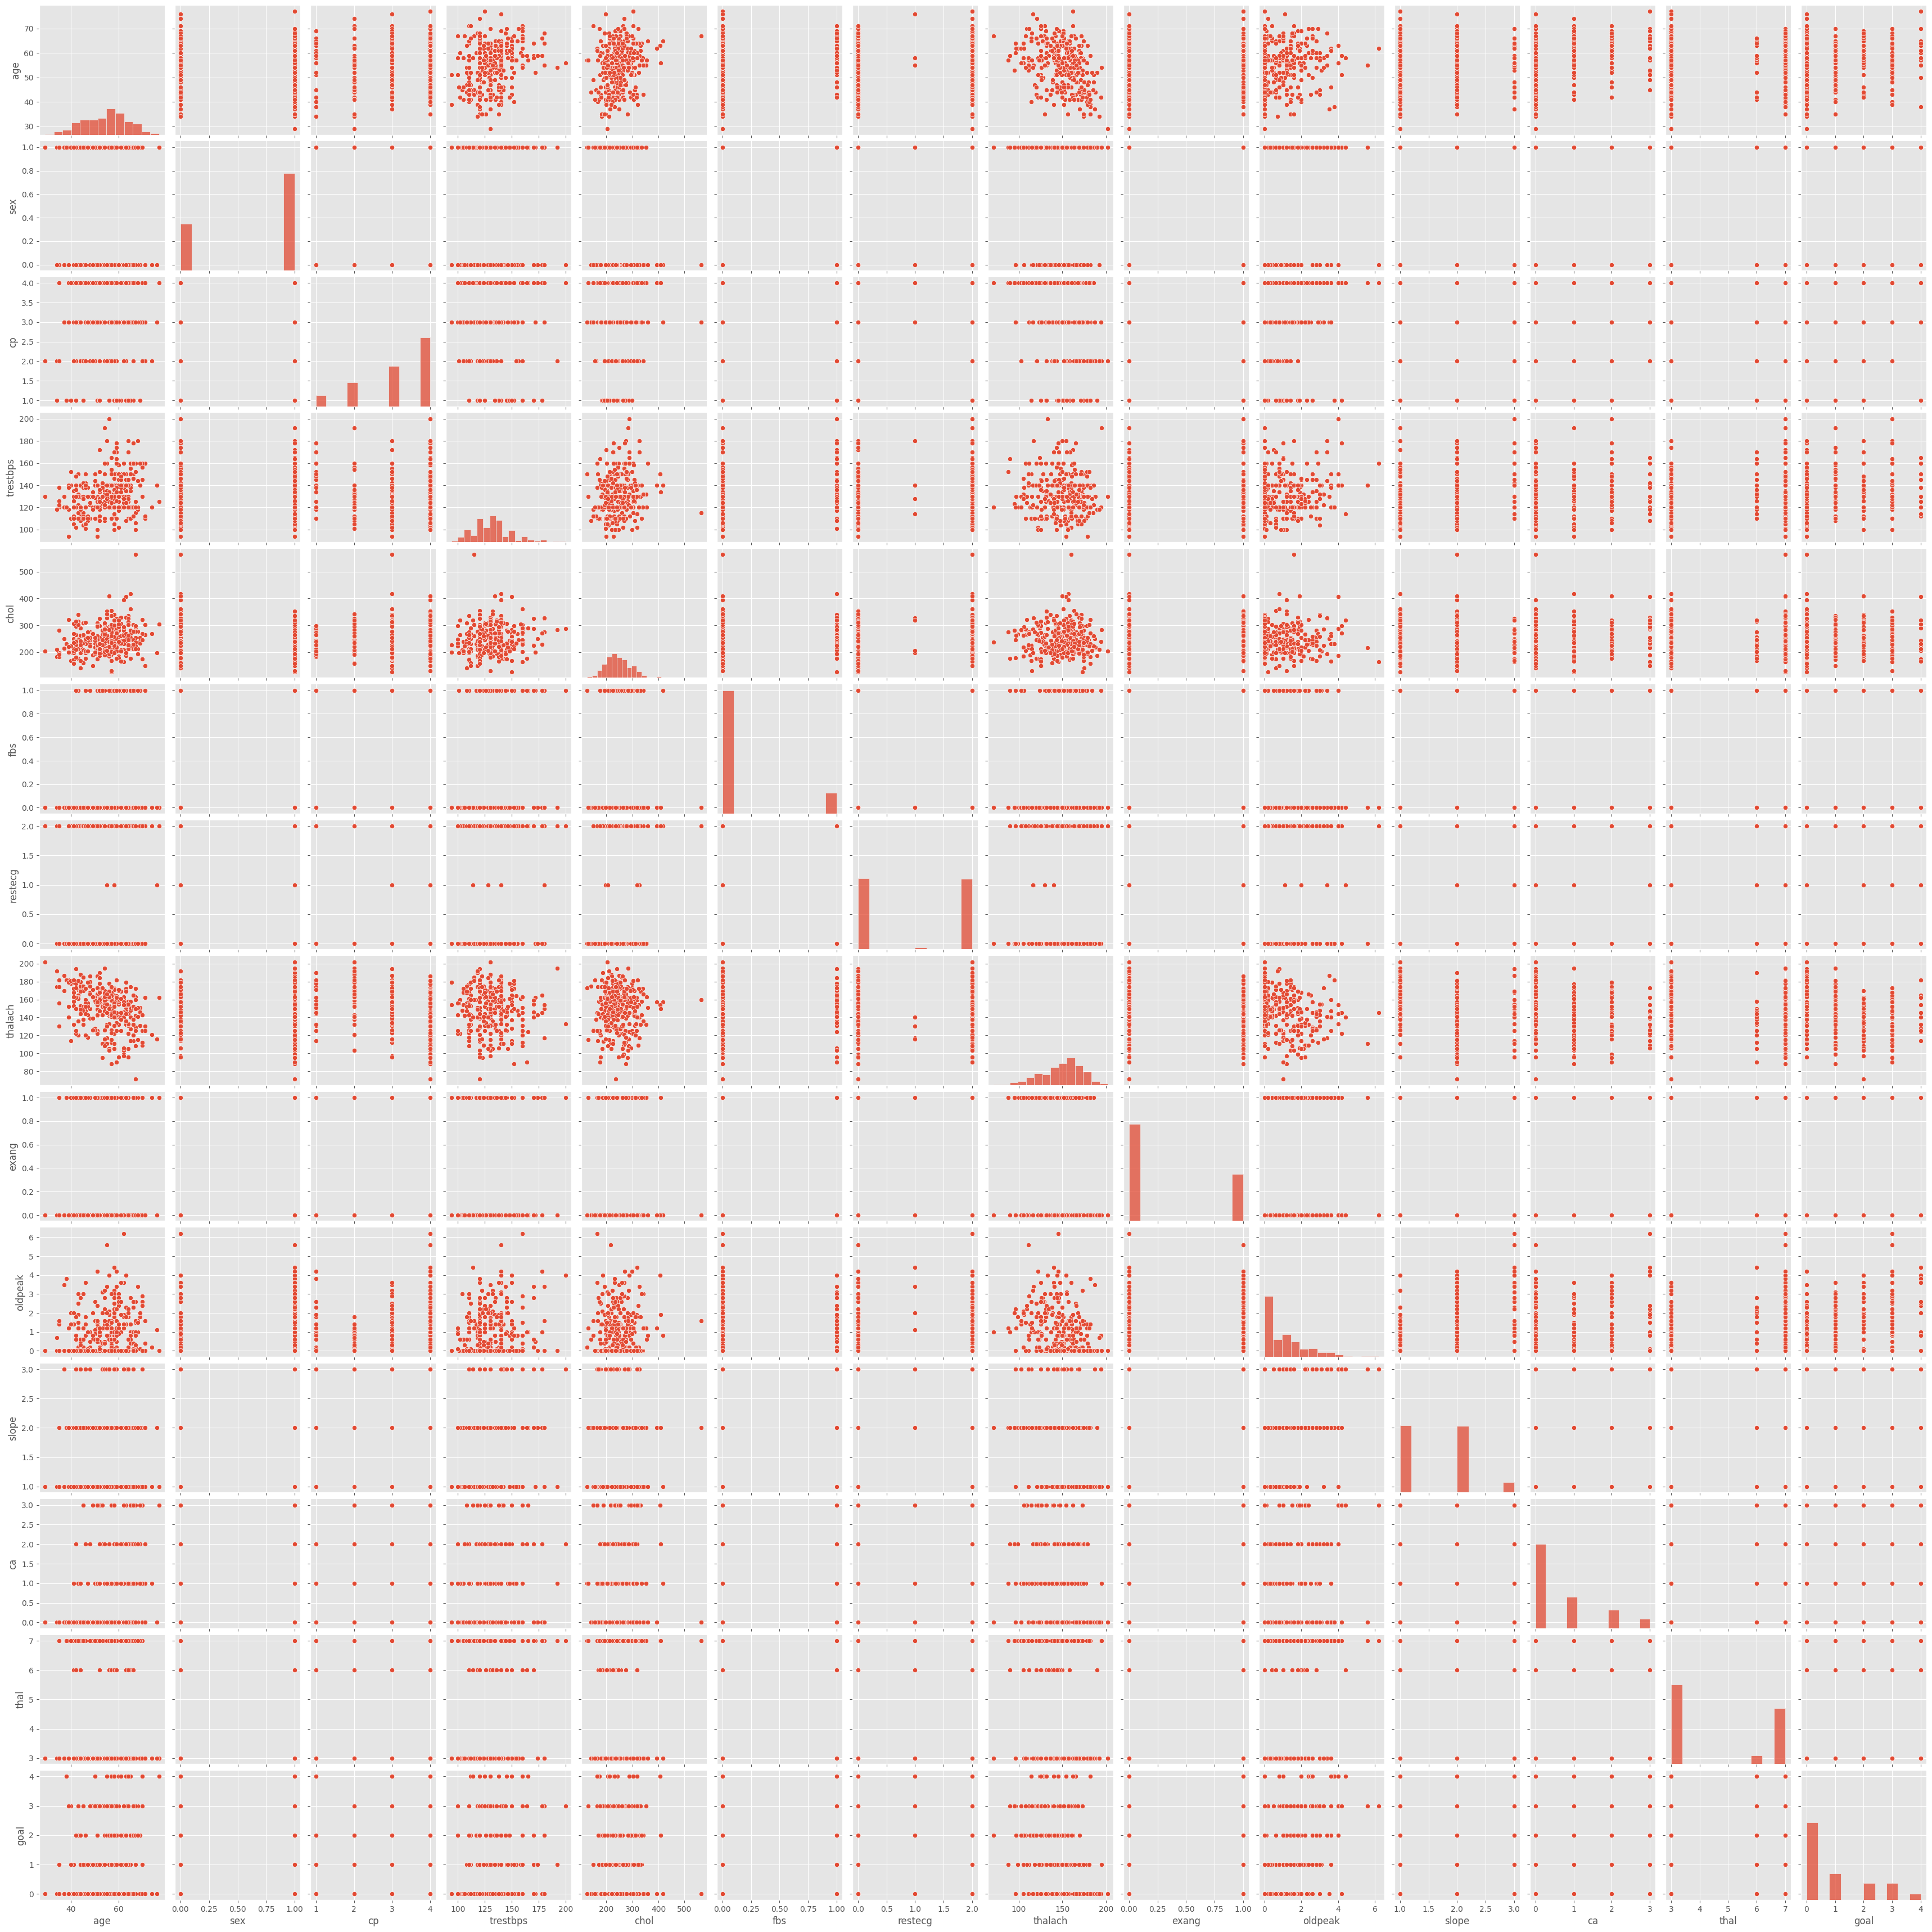

In [10]:
sns.pairplot(heartDisease)

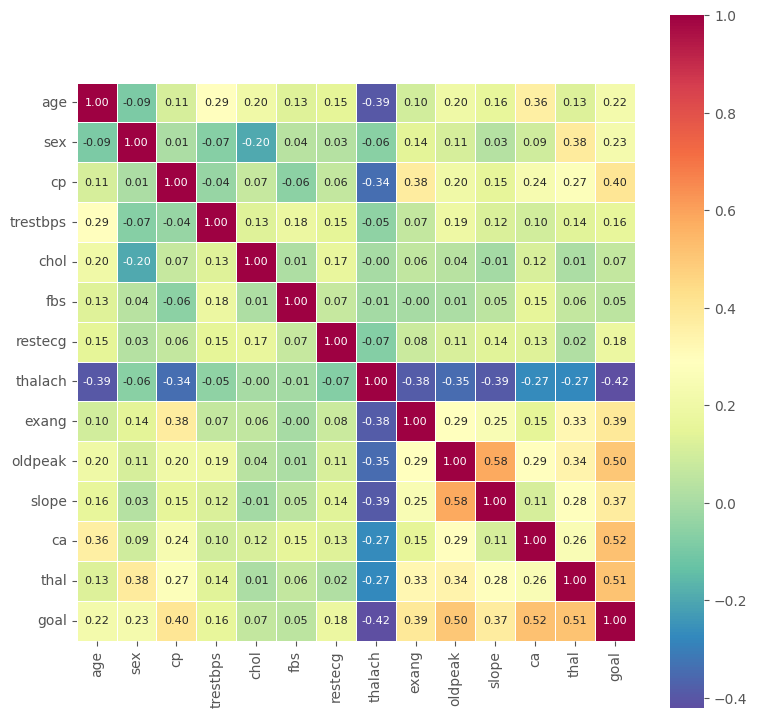

In [11]:
plt.figure(figsize = (9,9))
corrmat = heartDisease.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 8}, 
                 yticklabels=heartDisease.columns, 
                 xticklabels=heartDisease.columns,
                 linewidths=.7,
                 cmap="Spectral_r")

plt.show()

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [114]:
from sklearn.metrics import classification_report, precision_recall_fscore_support, multilabel_confusion_matrix, recall_score
accuracy, sensitivity, specificity = [], [], []

In [131]:
# Define function to calculate multi-class sensitivity, specificity, and confusion matrix
# Based on the link: https://towardsdatascience.com/multi-class-classification-extracting-performance-metrics-from-the-confusion-matrix-b379b427a872
def matrix(y_test, y_pred):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = round((TP/(TP+FN)).mean(),2)
    # Specificity or true negative rate
    TNR = round((TN/(TN+FP)).mean(),2)
    
    return TPR, TNR, cnf_matrix

Accuracy of Logistic regression classifier on training set: 0.66
Accuracy of Logistic regression classifier on test set: 0.55


<AxesSubplot:>

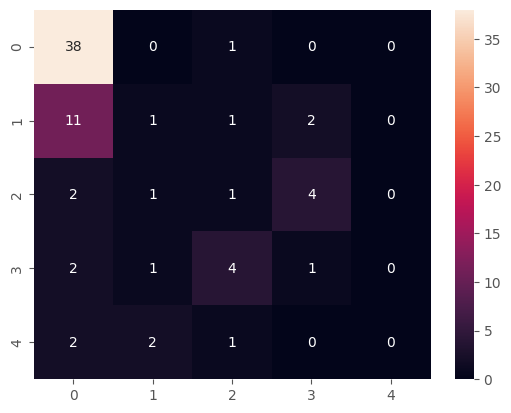

In [132]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
y_pred = logreg.predict(X_test)

# Get accuracy and append in the accuracy list
accuracy.append(round(logreg.score(X_test, y_test),2))

# Get sensitivity and append in the sensitivity list
sensitivity.append(matrix(y_test, y_pred)[0])

# Get specificity and append in the specificity list
specificity.append(matrix(y_test, y_pred)[1])

# Confusion matrix as a heatmap
sns.heatmap(matrix(y_test, y_pred)[2], annot=True)

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.51


<AxesSubplot:>

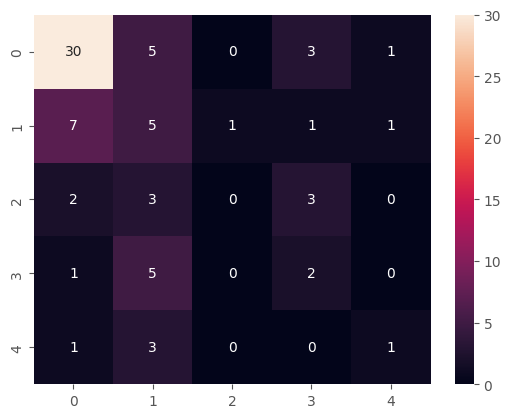

In [133]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_test)

# Get accuracy and append in the accuracy list
accuracy.append(round(clf.score(X_test, y_test),2))

# Get sensitivity and append in the sensitivity list
sensitivity.append(matrix(y_test, y_pred)[0])

# Get specificity and append in the specificity list
specificity.append(matrix(y_test, y_pred)[1])

# Confusion matrix as a heatmap
sns.heatmap(matrix(y_test, y_pred)[2], annot=True)

Accuracy of K-NN classifier on training set: 0.68
Accuracy of K-NN classifier on test set: 0.55


<AxesSubplot:>

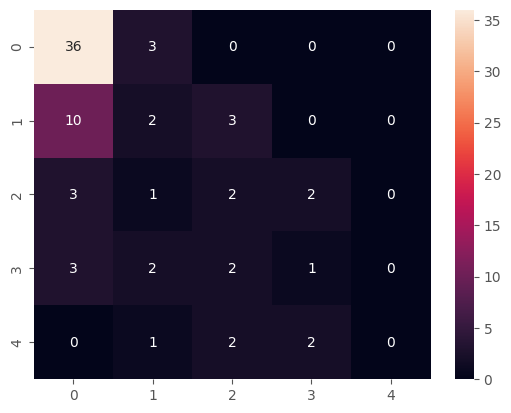

In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

y_pred = knn.predict(X_test)

# Get accuracy and append in the accuracy list
accuracy.append(round(knn.score(X_test, y_test),2))

# Get sensitivity and append in the sensitivity list
sensitivity.append(matrix(y_test, y_pred)[0])

# Get specificity and append in the specificity list
specificity.append(matrix(y_test, y_pred)[1])

# Confusion matrix as a heatmap
sns.heatmap(matrix(y_test, y_pred)[2], annot=True)

Accuracy of LDA classifier on training set: 0.68
Accuracy of LDA classifier on test set: 0.56


<AxesSubplot:>

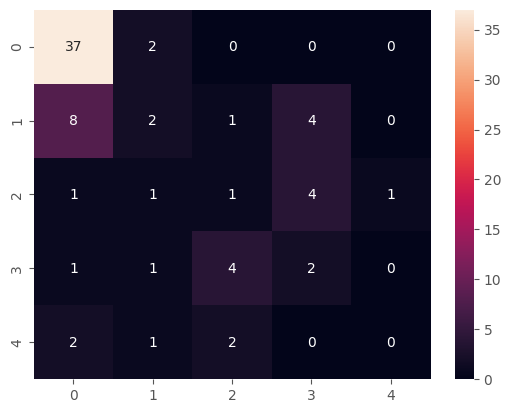

In [135]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

y_pred = lda.predict(X_test)

# Get accuracy and append in the accuracy list
accuracy.append(round(lda.score(X_test, y_test),2))

# Get sensitivity and append in the sensitivity list
sensitivity.append(matrix(y_test, y_pred)[0])

# Get specificity and append in the specificity list
specificity.append(matrix(y_test, y_pred)[1])

# Confusion matrix as a heatmap
sns.heatmap(matrix(y_test, y_pred)[2], annot=True)

Accuracy of GNB classifier on training set: 0.60
Accuracy of GNB classifier on test set: 0.51


<AxesSubplot:>

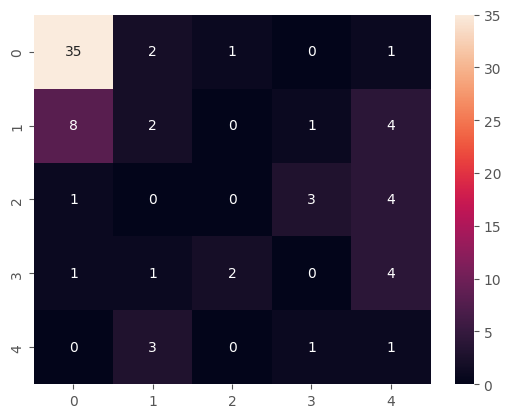

In [136]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

y_pred = gnb.predict(X_test)

# Get accuracy and append in the accuracy list
accuracy.append(round(gnb.score(X_test, y_test),2))

# Get sensitivity and append in the sensitivity list
sensitivity.append(matrix(y_test, y_pred)[0])

# Get specificity and append in the specificity list
specificity.append(matrix(y_test, y_pred)[1])

# Confusion matrix as a heatmap
sns.heatmap(matrix(y_test, y_pred)[2], annot=True)

Accuracy of SVM classifier on training set: 0.69
Accuracy of SVM classifier on test set: 0.51


<AxesSubplot:>

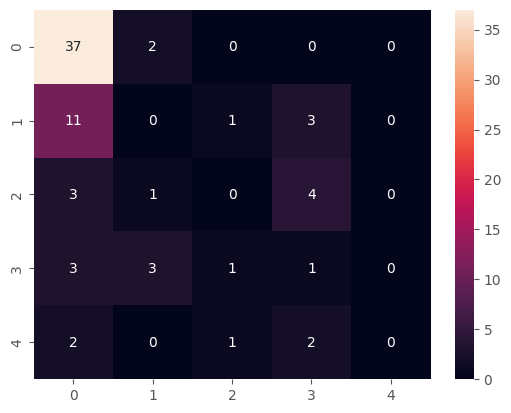

In [137]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

y_pred = svm.predict(X_test)

# Get accuracy and append in the accuracy list
accuracy.append(round(svm.score(X_test, y_test),2))

# Get sensitivity and append in the sensitivity list
sensitivity.append(matrix(y_test, y_pred)[0])

# Get specificity and append in the specificity list
specificity.append(matrix(y_test, y_pred)[1])

# Confusion matrix as a heatmap
sns.heatmap(matrix(y_test, y_pred)[2], annot=True)

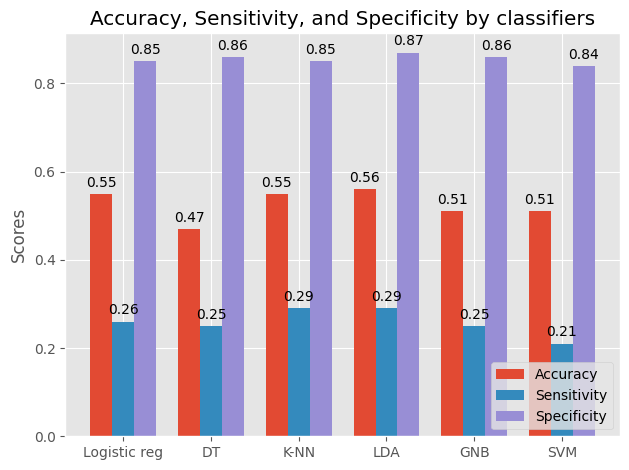

In [123]:
labels = ['Logistic reg', 'DT', 'K-NN', 'LDA', 'GNB', 'SVM']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x, sensitivity, width, label='Sensitivity')
rects3 = ax.bar(x + width, specificity, width, label='Specificity')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Accuracy, Sensitivity, and Specificity by classifiers')
ax.set_xticks(x, labels)
ax.legend(loc='lower right')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()